In [51]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [52]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   
6                 3          3        Medical              1              10   
7                24          1  Life Sciences              1              11   
8                23          3  Life Sciences              1              12   
9                27          3        Medical              1              13   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   
5  ...                         3            80                 0   
6  ...                         1            80                 3   
7  ...                         2            80                 1   
8  ...                         2            80                 0   
9  ...                         2            80                 2   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   
5                  8                      2               2               7   
6                 12                      3               2               1   
7                  1                      2               3               1   
8                 10                      2               3               9   
9                 17                      3               2               7   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  
5                  7                        3                     6  
6                  0                        0                     0  
7                  0                        0                     0  
8                  7                        1             

In [53]:
df.shape

(1470, 35)

In [54]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [55]:
attrition_rate = df["Attrition"].value_counts()
attrition_rate

No     1233
Yes     237
Name: Attrition, dtype: int64

In [56]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [57]:
df.describe().transpose()

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [58]:
df[df.duplicated(keep = False)]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]

In [59]:
#df.BusinessTravel.value_counts()
df["BusinessTravel"].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [60]:
pd.crosstab(df.Attrition, df.BusinessTravel)

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No                     138                208            887
Yes                     12                 69            156

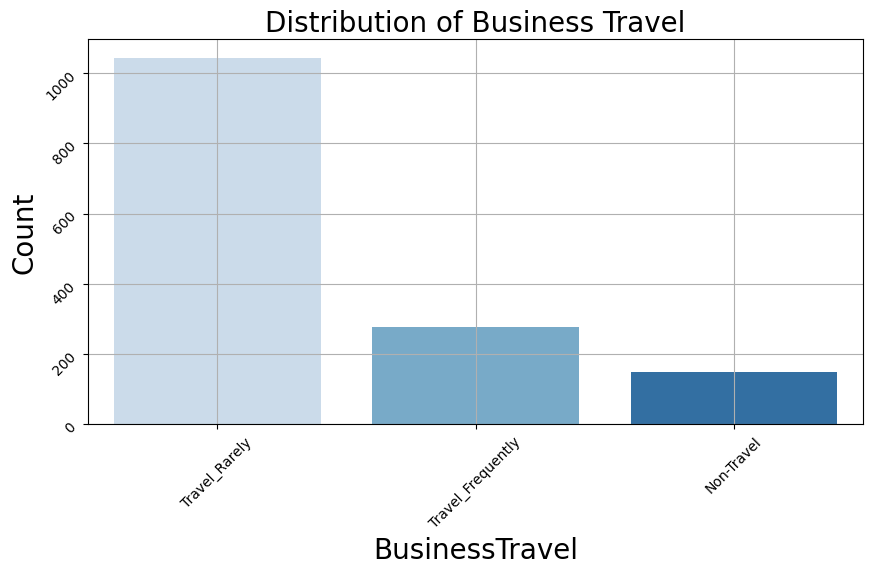

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.countplot(x = "BusinessTravel", data = df, palette = 'Blues')
plt.grid(True)
plt.title ('Distribution of Business Travel', fontsize = 20)
plt.xlabel('BusinessTravel', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [62]:
df.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [63]:
#what is the hights EducationField
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [64]:
#what is the mean DailyRate for each Department?
df.groupby("Department")['DailyRate'].mean().to_frame()

DailyRate
Department                        
Human Resources         751.539683
Research & Development  806.851197
Sales                   800.275785

In [65]:
#Is males has high job Satisfaction more than females?
df.groupby("Gender")['JobSatisfaction'].sum()

Gender
Female    1578
Male      2433
Name: JobSatisfaction, dtype: int64

<Axes: xlabel='MaritalStatus', ylabel='count'>

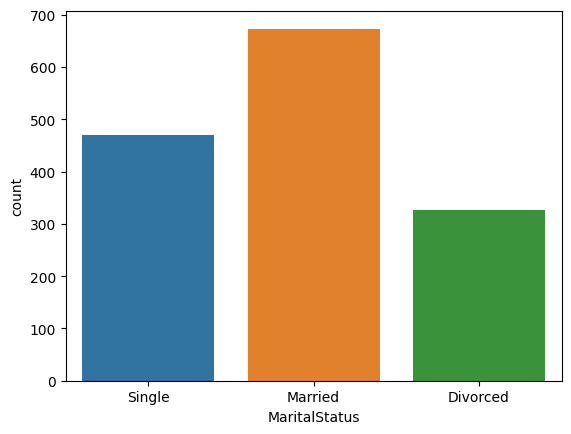

In [66]:
#Is singles more than married?
sns.countplot(data = df, x = "MaritalStatus")

<Axes: xlabel='MaritalStatus', ylabel='MonthlyIncome'>

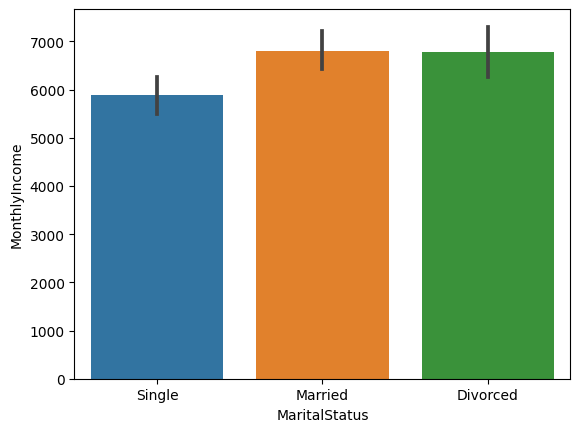

In [67]:
sns.barplot(data = df, x = 'MaritalStatus', y = 'MonthlyIncome')

In [68]:
f_employees = df [df['Gender'] == 'Female']
m_employees = df [df['Gender'] == 'Male']
df_new = f_employees[f_employees['TotalWorkingYears']>30]
df_new['TotalWorkingYears']

18      31
126     40
233     32
401     36
408     31
411     33
445     37
624     35
627     31
649     33
749     33
867     32
890     33
966     31
1009    32
1111    34
1184    36
Name: TotalWorkingYears, dtype: int64

In [69]:
grouped_data = df.groupby(['JobSatisfaction', 'Attrition']).size().reset_index(name = 'Count')
grouped_data

JobSatisfaction Attrition  Count
0                1        No    223
1                1       Yes     66
2                2        No    234
3                2       Yes     46
4                3        No    369
5                3       Yes     73
6                4        No    407
7                4       Yes     52

In [70]:
#grouped_data = df.groupby(['JobSatisfaction', 'Attrition', 'Gender']).size().reset_index(name = 'Count')
grouped_data = df.groupby(['JobSatisfaction', 'Attrition', 'Gender']).mean()
grouped_data

<ipython-input-70-05225782476d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby(['JobSatisfaction', 'Attrition', 'Gender']).mean()


Age   DailyRate  DistanceFromHome  \
JobSatisfaction Attrition Gender                                            
1               No        Female  41.000000  834.030612          8.846939   
                          Male    35.664000  759.456000          8.640000   
                Yes       Female  32.000000  705.523810         11.285714   
                          Male    33.800000  770.244444         10.488889   
2               No        Female  36.191489  742.893617          8.148936   
                          Male    38.714286  801.721429          8.835714   
                Yes       Female  32.500000  784.458333         12.375000   
                          Male    34.272727  689.500000         11.318182   
3               No        Female  38.212903  842.703226          9.541935   
                          Male    37.238318  856.336449          9.060748   
                Yes       Female  31.461538  697.192308         10.038462   
                          Male    35.191489  793.382979         10.297872   
4               No        Female  37.487013  840.519481          8.792208   
                          Male    36.956522  789.577075          8.976285   
                Yes       Female  35.250000  741.812500          9.687500   
                          Male    33.388889  752.166667         10.138889   

                                  Education  EmployeeCount  EmployeeNumber  \
JobSatisfaction Attrition Gender                                             
1               No        Female   3.102041            1.0      962.265306   
                          Male     2.840000            1.0     1118.152000   
                Yes       Female   2.761905            1.0      889.142857   
                          Male     2.977778            1.0     1177.466667   
2               No        Female   2.936170            1.0     1037.978723   
                          Male     2.857143            1.0     1037.028571   
                Yes       Female   2.875000            1.0     1137.708333   
                          Male     3.000000            1.0     1144.409091   
3               No        Female   2.954839            1.0     1022.883871   
                          Male     2.920561            1.0     1076.242991   
                Yes       Female   2.807692            1.0     1027.692308   
                          Male     2.808511            1.0      794.404255   
4               No        Female   2.889610            1.0     1000.811688   
                          Male     2.948617            1.0      977.418972   
                Yes       Female   2.625000            1.0      975.250000   
                          Male     2.750000            1.0      990.305556   

                                  EnvironmentSatisfaction  HourlyRate  \
JobSatisfaction Attrition Gender                                        
1               No        Female                 2.918367   66.979592   
                          Male                   2.776000   69.464000   
                Yes       Female                 2.285714   64.761905   
                          Male                   2.488889   71.755556   
2               No        Female                 2.893617   66.234043   
                          Male                   2.814286   67.014286   
                Yes       Female                 2.166667   71.791667   
                          Male                   2.545455   60.272727   
3               No        Female                 2.619355   66.593548   
                          Male                   2.719626   64.280374   
                Yes       Female                 2.384615   55.846154   
                          Male                   2.595745   66.978723   
4               No        Female                 2.792208   64.928571   
                          Male                   2.766798   64.770751   
                Yes       Female                 2.750000   69.062500   
       

In [71]:
df[['Age','DailyRate']]

Age  DailyRate
0      41       1102
1      49        279
2      37       1373
3      33       1392
4      27        591
...   ...        ...
1465   36        884
1466   39        613
1467   27        155
1468   49       1023
1469   34        628

[1470 rows x 2 columns]

In [72]:
df[10:20]

Age Attrition BusinessTravel  DailyRate              Department  \
10   35        No  Travel_Rarely        809  Research & Development   
11   29        No  Travel_Rarely        153  Research & Development   
12   31        No  Travel_Rarely        670  Research & Development   
13   34        No  Travel_Rarely       1346  Research & Development   
14   28       Yes  Travel_Rarely        103  Research & Development   
15   29        No  Travel_Rarely       1389  Research & Development   
16   32        No  Travel_Rarely        334  Research & Development   
17   22        No     Non-Travel       1123  Research & Development   
18   53        No  Travel_Rarely       1219                   Sales   
19   38        No  Travel_Rarely        371  Research & Development   

    DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
10                16          3        Medical              1              14   
11                15          2  Life Sciences              1              15   
12                26          1  Life Sciences              1              16   
13                19          2        Medical              1              18   
14                24          3  Life Sciences              1              19   
15                21          4  Life Sciences              1              20   
16                 5          2  Life Sciences              1              21   
17                16          2        Medical              1              22   
18                 2          4  Life Sciences              1              23   
19                 2          3  Life Sciences              1              24   

    ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
10  ...                         3            80                 1   
11  ...                         4            80                 0   
12  ...                         4            80                 1   
13  ...                         3            80                 1   
14  ...                         2            80                 0   
15  ...                         3            80                 1   
16  ...                         4            80                 2   
17  ...                         2            80                 2   
18  ...                         3            80                 0   
19  ...                         3            80                 0   

    TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
10                  6                      5               3               5   
11                 10                      3               3               9   
12                  5                      1               2               5   
13                  3                      2               3               2   
14                  6                      4               3               4   
15                 10                      1               3              10   
16                  7                      5               2               6   
17                  1                      2               2               1   
18                 31                      3               3              25   
19                  6                      3               3               3   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
10                  4                        0                     3  
11                  5                        0                     8  
12                  2                        4                     3  
13                  2                        1                     2  
14                  2                        0                     3  
15                  9                        8                     8  
16                  2                        0                     5  
17                  0                        0                     0  
18                  8                        3    

In [73]:
df.loc[10:20, ['Age', 'Gender', 'MonthlyIncome']]

Age  Gender  MonthlyIncome
10   35    Male           2426
11   29  Female           4193
12   31    Male           2911
13   34    Male           2661
14   28    Male           2028
15   29  Female           9980
16   32    Male           3298
17   22    Male           2935
18   53  Female          15427
19   38    Male           3944
20   24  Female           4011

In [74]:
df.iloc[10:20, [1,3,4,7]]

Attrition  DailyRate              Department EducationField
10        No        809  Research & Development        Medical
11        No        153  Research & Development  Life Sciences
12        No        670  Research & Development  Life Sciences
13        No       1346  Research & Development        Medical
14       Yes        103  Research & Development  Life Sciences
15        No       1389  Research & Development  Life Sciences
16        No        334  Research & Development  Life Sciences
17        No       1123  Research & Development        Medical
18        No       1219                   Sales  Life Sciences
19        No        371  Research & Development  Life Sciences

In [75]:
df_sorted = df.sort_values(by = 'Age')
df_sorted.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
1311   18        No         Non-Travel       1431  Research & Development   
457    18       Yes  Travel_Frequently       1306                   Sales   
972    18        No         Non-Travel       1124  Research & Development   
301    18        No      Travel_Rarely        812                   Sales   
296    18       Yes      Travel_Rarely        230  Research & Development   
1153   18       Yes  Travel_Frequently        544                   Sales   
727    18        No         Non-Travel        287  Research & Development   
828    18       Yes         Non-Travel        247  Research & Development   
909    19        No      Travel_Rarely        265  Research & Development   
422    19       Yes      Travel_Rarely        489         Human Resources   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
1311                14          3           Medical              1   
457                  5          3         Marketing              1   
972                  1          3     Life Sciences              1   
301                 10          3           Medical              1   
296                  3          3     Life Sciences              1   
1153                 3          2           Medical              1   
727                  5          2     Life Sciences              1   
828                  8          1           Medical              1   
909                 25          3     Life Sciences              1   
422                  2          2  Technical Degree              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1311            1839  ...                         3            80   
457              614  ...                         4            80   
972             1368  ...                         3            80   
301              411  ...                         1            80   
296              405  ...                         3            80   
1153            1624  ...                         3            80   
727             1012  ...                         4            80   
828             1156  ...                         4            80   
909             1269  ...                         4            80   
422              566  ...                         3            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1311                 0                  0                      4   
457                  0                  0                      3   
972                  0                  0                      5   
301                  0                  0                      2   
296                  0                  0                      2   
1153                 0                  0                      2   
727                  0                  0                      2   
828                  0                  0                      0   
909                  0                  1                      2   
422                  0                  1                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1311               1               0                  0   
457                3               0                  0   
972                4               0                  0   
301                3               0                  0   
296                3               0                  0   
1153               4               0                  0   
727                3               0                  0   
828                3               0                  0   
909                3               1                  0   
422                4               1                  0   

      YearsSinceLastPromotion  YearsWithCurrManager  
1311                        0                     0  
457                         0                     0  
972                         0                     0  
301         

In [76]:
#MultipleSorting
df_sorted = df.sort_values(by = ['Age', 'DailyRate'], ascending = [True, False])
df_sorted.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
1311   18        No         Non-Travel       1431  Research & Development   
457    18       Yes  Travel_Frequently       1306                   Sales   
972    18        No         Non-Travel       1124  Research & Development   
301    18        No      Travel_Rarely        812                   Sales   
1153   18       Yes  Travel_Frequently        544                   Sales   
727    18        No         Non-Travel        287  Research & Development   
828    18       Yes         Non-Travel        247  Research & Development   
296    18       Yes      Travel_Rarely        230  Research & Development   
149    19        No      Travel_Rarely       1181  Research & Development   
853    19        No      Travel_Rarely        645  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1311                14          3        Medical              1   
457                  5          3      Marketing              1   
972                  1          3  Life Sciences              1   
301                 10          3        Medical              1   
1153                 3          2        Medical              1   
727                  5          2  Life Sciences              1   
828                  8          1        Medical              1   
296                  3          3  Life Sciences              1   
149                  3          1        Medical              1   
853                  9          2  Life Sciences              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1311            1839  ...                         3            80   
457              614  ...                         4            80   
972             1368  ...                         3            80   
301              411  ...                         1            80   
1153            1624  ...                         3            80   
727             1012  ...                         4            80   
828             1156  ...                         4            80   
296              405  ...                         3            80   
149              201  ...                         4            80   
853             1193  ...                         3            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1311                 0                  0                      4   
457                  0                  0                      3   
972                  0                  0                      5   
301                  0                  0                      2   
1153                 0                  0                      2   
727                  0                  0                      2   
828                  0                  0                      0   
296                  0                  0                      2   
149                  0                  1                      3   
853                  0                  1                      4   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1311               1               0                  0   
457                3               0                  0   
972                4               0                  0   
301                3               0                  0   
1153               4               0                  0   
727                3               0                  0   
828                3               0                  0   
296                3               0                  0   
149                3               1                  0   
853                3               1                  1   

      YearsSinceLastPromotion  YearsWithCurrManager  
1311                        0                     0  
457                         0                     0  
972                         0                     0  
301                         0                

In [77]:
df.groupby('Gender').agg({'Age': 'mean'})

Age
Gender           
Female  37.329932
Male    36.653061

In [78]:
df[['Age', 'TotalWorkingYears']].agg(['min', 'mean', 'max'])

Age  TotalWorkingYears
min   18.00000           0.000000
mean  36.92381          11.279592
max   60.00000          40.000000

In [81]:
average_salary_first_100 = df.head(100)['MonthlyIncome'].mean()
average_salary_first_100

6021.99

In [82]:
df.groupby('Department')['TotalWorkingYears'].mean().to_frame()


TotalWorkingYears
Department                               
Human Resources                 11.555556
Research & Development          11.342352
Sales                           11.105381

In [83]:
df.OverTime = df.OverTime.replace("Yes" , 1).replace("No" ,0)
df.groupby("Gender")["OverTime"].sum()

Gender
Female    180
Male      236
Name: OverTime, dtype: int64

In [84]:
df.YearsAtCompany.max()

#df[df.YearsAtCompany == 40]

40

In [87]:
df1 = df[df.YearsAtCompany == 40]
df1.loc[:, ['Age']]

Age
126   58

In [89]:
pd.crosstab(df.Attrition,df.Department)

Department  Human Resources  Research & Development  Sales
Attrition                                                 
No                       51                     828    354
Yes                      12                     133     92